# Assignment: Linear Models
#Nora Wiktorowicz
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

# **Q1.** Please answer the following questions in your own words.

**1. What makes a model "linear"? "Linear" in what?**

A model is linear if the relationship between the independent and dependent variables is linear, meaning that the variables/parameters relationship display a rate of constant change, and the equation degree may be 1. In other words, the trend line of the graph should be a straight line. The model is "linear" in its parameters, as the dependent variable is linear to the other variables.

**2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)**

When interpreting the coefficient for a dummy/one-hot-encoded variable, you utilize the intercept of the model, which is the outcome for the reference category (which is not included when using a dummy variable). If the dummy variable is 1, the coefficient is interpreted as the difference between the reference category and the variable representing the dummy.

**3. Can linear regression be used for classification? Explain why, or why not.**

No, linear regression cannot be used for classification. Classification organizes data into classes, or categories. Linear regression only predicts continuous values. Therefore, as it cannot predict discrete/categorical values, it cannot be used for classification.

**4. What are signs that your linear model is over-fitting?**

Overfitting occurs when the model is trained too closely to the training data, and does not adjust/adapt to other fits/outliers in the test data. My linear model may be over-fitted if the model shows a high R squared on the training set, and low R squared on the test set, the model has high standard error/variables, or highly unrealistic coefficients that do not make sense given the model.

**5. Clearly explain multi-colinearity using the two-stage least squares technique.**

Multi-colinearity is when the correlation between independent variables is quite high. The two-stage least squares technique uses two steps to evaluate the correlation between independent variables. First,a regression is calculated of the endogenous variable (variable suspected of high correlation) on the exogenous variables (all other independent variables). Next, a regression is calculated of the dependent variable on all variables from the first step. The coefficients become the new two stage least squares technique estimates.

**6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?**

You can incorporate nonlinear relationships between your variables through several ways. First, you can transform your varibales so that they have linear relationships, such as logging your variables. Second, you can perform nonlinear regression, which creates a nonlinear relationship between your target variable and your control/response/independent variables.

***7.What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable? ***

The interpretation of the intercept is that when all independent variables are equal to 0, the expected value of the dependent variable is equal to (the intercept). The slope coefficient shows that, holding all other variables constant, when the predictor variable increases by 1 unit, the dependent variable will increase by the (slope coefficient). The coefficient for a dummy variable shows that, holding all other variables constant, the difference between the dependent variable is the difference between the category represented by the dummy variable, and the reference category.

# **Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

In [4]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 9), reused 9 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 3.62 MiB | 8.64 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
rental = pd.read_csv('/content/linearModels/assignment/data/Q1_clean.csv', low_memory = False)
rental.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


**1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.**

In [6]:
print(rental.columns)

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')


In [7]:
#compute the average prices and scores by neighborhood
avg_ps = rental.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean() #Fixed: Replaced 'Neighbourhood' with 'Neighborhood '
print(avg_ps)
most_expensive = avg_ps['Price'].idxmax()
print(most_expensive)


                     Price  Review Scores Rating
Neighbourhood                                   
Bronx            75.276498             91.654378
Brooklyn        127.747378             92.363497
Manhattan       183.664286             91.801496
Queens           96.857233             91.549057
Staten Island   146.166667             90.843750
Manhattan


On average, the bourough of Manhattan is the most expensive.

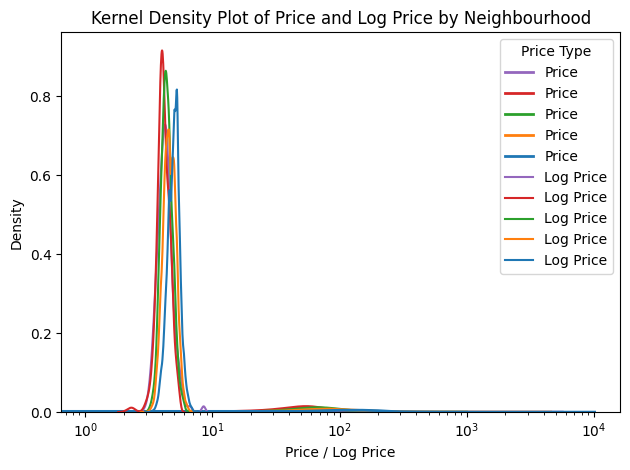

In [8]:
#create a kernel density plot of price and log price, grouped by neighborhood
rental['Log Price'] = np.log(rental['Price'])
sns.kdeplot(data=rental, x='Price', hue='Neighbourhood ', common_norm=False, label='Price', linewidth=2)
sns.kdeplot(data=rental, x='Log Price', hue='Neighbourhood ', common_norm=False, label='Log Price')
plt.title('Kernel Density Plot of Price and Log Price by Neighbourhood')
plt.xscale('log')
plt.xlabel('Price / Log Price')
plt.ylabel('Density')
plt.legend(title="Price Type")
plt.tight_layout()
plt.show()

**2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?**

In [11]:
neighborhood_dummies = pd.get_dummies(rental['Neighbourhood '], drop_first=False)
data_for_regression = pd.concat([rental['Price'], neighborhood_dummies], axis=1)
y = data_for_regression['Price']
X = data_for_regression.drop('Price', axis=1)
model = sm.OLS(y, X).fit()
print(model.summary())
print(pd.concat([model.params, avg_ps['Price']], axis=1).rename(columns={0: "Coefficient", "Price": "Average Price"}))


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        00:05:31   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

When comparing the regression coefficients to the table from part 1, I see a clear pattern. The prices follow the same pattern as the coefficients in part 1. For example, Manhattan shows the highest price in the regression table (183), and the highest price in part 1 table (183), followed by Staten Island, etc. The coefficients are the same as the average prices. The coefficients in a regression of a continuous variable on one categorical variable (price on neighborhood), the coefficients are the difference between the dummy variable and the coefficients. For example, the Manhattan coefficient of 183.66 shows that, on average, rentals in Manhattan are $183.66.

**3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?**

In [15]:
neighborhood_dummies = pd.get_dummies(rental['Neighbourhood '], drop_first=True)
data_for_regression = pd.concat([rental['Price'], neighborhood_dummies], axis=1)
y = data_for_regression['Price']
X = data_for_regression.drop('Price', axis=1)
X = sm.add_constant(X)
X = X.astype(float)
model_with_intercept = sm.OLS(y, X).fit()
print(model_with_intercept.summary())
print("\nIntercept:", model_with_intercept.params['const'])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        00:08:52   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628

To do this, I had to handle the creation of the dummies differently by using "drop_first=False." This ensures that a dummy variable is being created for every neighborhood. The intercept is the average price for the reference category that was dropped when creating dummy variables. The intercept is 75.27. The coefficients are the difference in price between the average price and the reference category. Brooklyn apartments are 52.47 dollars more expensive compared to the dummy variable (that was dropped). The same pattern continues for the other coefficients. For example, Manhattan apartments are 108.39 dollars more expensive compared to the dummy variable. The coefficients in part 2 are the same coefficients as part two, but they are added to the intercept.

**4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**

In [20]:
rental['Log Price'] = np.log(rental['Price'])
neighborhood_dummies = pd.get_dummies(rental['Neighbourhood '], drop_first=True)
data_for_regression = pd.concat([rental['Price'], rental['Review Scores Rating'], neighborhood_dummies], axis=1)
data_for_regression = data_for_regression.dropna()
y = data_for_regression['Price']
X = data_for_regression.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared on test set: {r2}")
print(f"RMSE on test set: {rmse}")

review_score_coefficient_index = X_train.columns.get_loc('Review Scores Rating')
review_score_coefficient = model.coef_[review_score_coefficient_index]
print(f"Coefficient for review scores rating: {review_score_coefficient}")
most_expensive_property = rental.loc[rental['Price'].idxmax(), 'Property Type']
print(f"Most expensive property type: {most_expensive_property}")

R-squared on test set: 0.045925883817350965
RMSE on test set: 140.91821103729345
Coefficient for review scores rating: 1.2118517840632352
Most expensive property type: Apartment


The r-squared is 0.04592 on the test set, and the RMSE is 140.92. The coefficient on the review scores rating is 1.21, and the most expensive property type is apartments.

**5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**

In [45]:
rental['Log Price'] = np.log(rental['Price'])
neighborhood_dummies = pd.get_dummies(rental['Neighbourhood '], drop_first=True)
property_type_dummies = pd.get_dummies(rental['Property Type'], drop_first=True)
data_for_regression = pd.concat([rental['Price'], rental['Review Scores Rating'], neighborhood_dummies, property_type_dummies], axis=1)
data_for_regression = data_for_regression.dropna()
y = data_for_regression['Price']
X = data_for_regression.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared on test set: {r2}")
print(f"RMSE on test set: {rmse}")

review_score_coefficient_index = X_train.columns.get_loc('Review Scores Rating')
review_score_coefficient = model.coef_[review_score_coefficient_index]
print(f"Coefficient for review scores rating: {review_score_coefficient}")

most_expensive_property = rental.loc[rental['Price'].idxmax(), 'Property Type']
print(f"Most expensive property type: {most_expensive_property}")

R-squared on test set: 0.054242713551245325
RMSE on test set: 140.30266238276283
Coefficient for review scores rating: 1.2010106602298556
Most expensive property type: Apartment


The r-squared on the test set for price on review scores rating, neighborhood, and property type is 0.054, while the RMSE is 140.30, and the coefficient is 1.2. The most expensive property type is still apartment.

**6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.**

The coefficient on review scores rating shows, holding all other variables constant, the change in prices for every one-unit increase in the review scores. If it changes from part 4 to 5, it means that property type affects the relationship between review scores and price. Part 4 shows the affect of neighborhood and review scores on price, and part 5 shows the affect of property type, neighborhood, and review scores on price. Multiple linear regression shows the effect of predictor variables while adjusting for the effect of other included variables. As the coefficient for review scores rating did not significantly change from 4 to 5, it implies that the relationship between review scores and price may be independent of property type.

# **Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

**1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.**

In [38]:
cars = pd.read_csv('/content/linearModels/assignment/data/cars_hw.csv', low_memory = False)
cars0 = cars
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


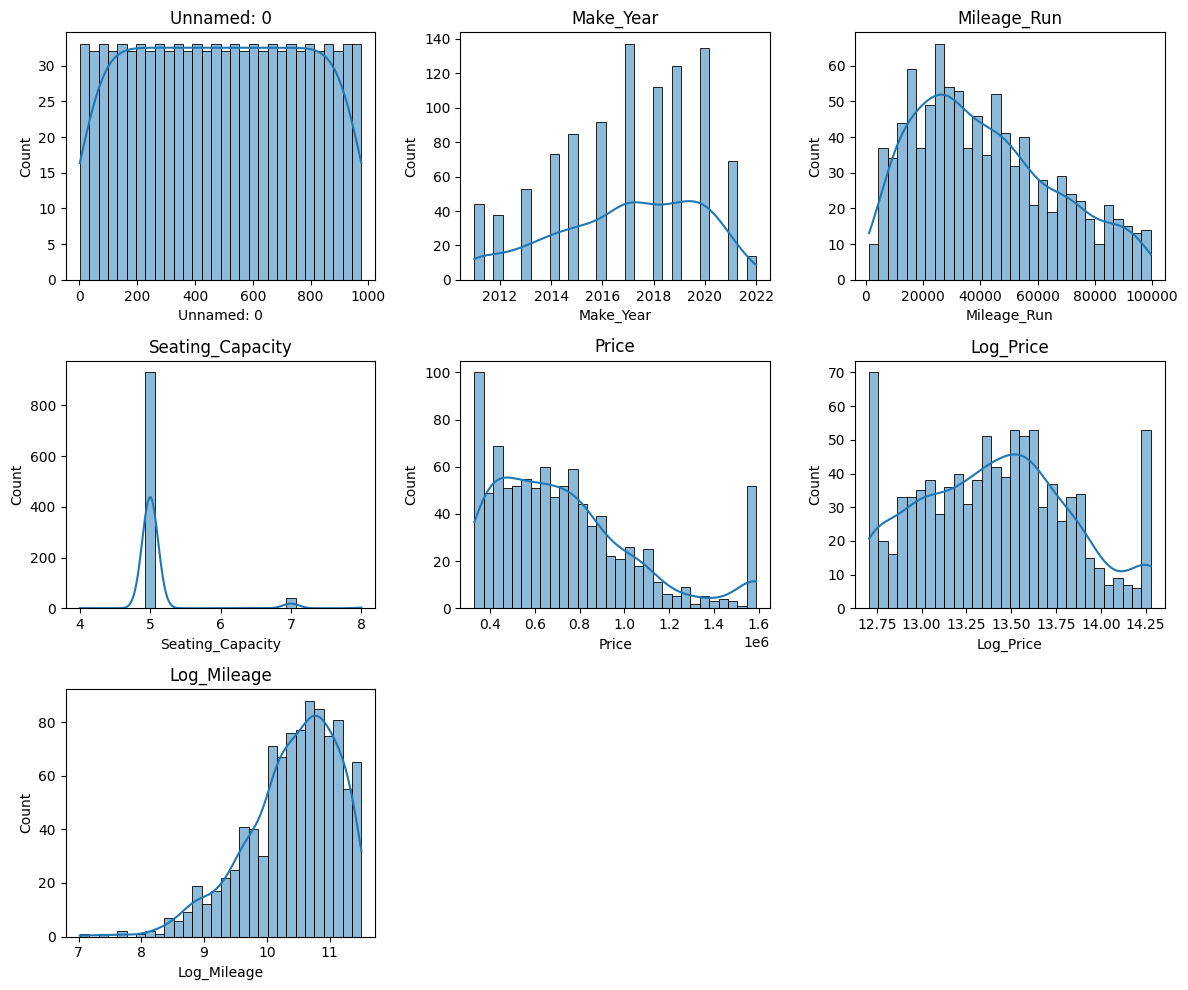

In [42]:
#find columns to apply transformations to
numeric_columns = cars.select_dtypes(include=[np.number]).columns

#checked for badly scaled variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cars[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cars = cars0.copy()
print(cars.isnull().sum())
cars['Mileage_Run'].fillna(cars['Mileage_Run'].median(), inplace=True)

from scipy.stats.mstats import winsorize
cars['Price'] = winsorize(cars['Price'], limits=[0.05, 0.05])

print(cars[['Price', 'Mileage_Run']].skew())

#apply log transformation to the skewed variables, as seen in kernel density plots above
cars['Log_Price'] = np.log1p(cars['Price'])
cars['Log_Mileage'] = np.log1p(cars['Mileage_Run'])

categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']
cars = pd.get_dummies(cars, columns=categorical_cols, drop_first=True)

print(cars.head())
print(cars.describe())

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
Price          1.065732
Mileage_Run    0.514496
dtype: float64
   Unnamed: 0  Make_Year  Mileage_Run No_of_Owners  Seating_Capacity   Price  \
0           1       2017        44611          1st                 5  657000   
1           2       2016        20305          1st                 5  682000   
2           3       2019        29540          2nd                 5  793000   
3           4       2017        35680          1st                 5  414000   
4           5       2017        25126          1st                 5  515000   

   Log_Price  Log_Mileage  Color_black  Color_blue  ...  Make_Tata  \
0  13.395441    10.705758        False       False  ...      False   
1  13.432786     9.918672  

<ipython-input-50-094ebff61a59>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['Mileage_Run'].fillna(cars['Mileage_Run'].median(), inplace=True)


**2.Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?**

count    9.760000e+02
mean     7.290430e+05
std      3.218430e+05
min      3.300000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      1.589000e+06
Name: Price, dtype: float64


<ipython-input-54-a94d7a53d7fd>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars['Price'], shade=True)


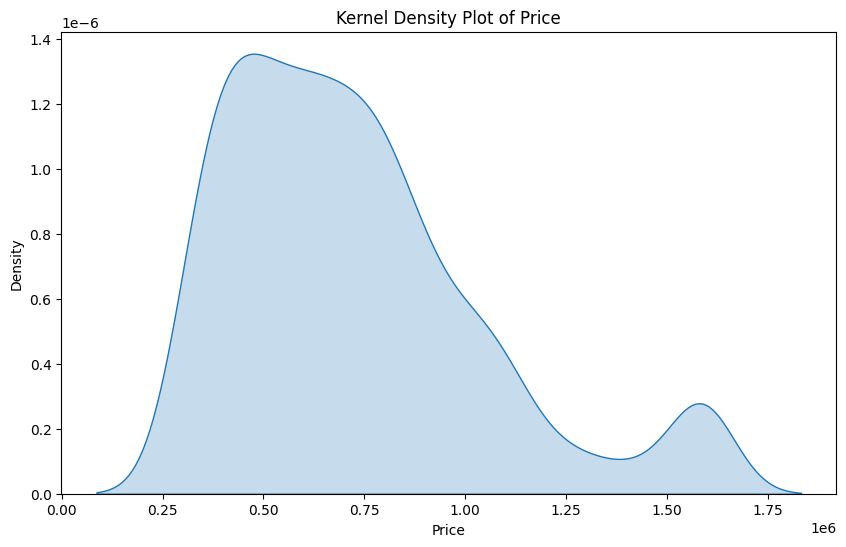

In [54]:
import matplotlib.pyplot as plt

#summarize the price variable
print(cars['Price'].describe())

#create kernel density plot of price
plt.figure(figsize=(10, 6))
sns.kdeplot(cars['Price'], shade=True)
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

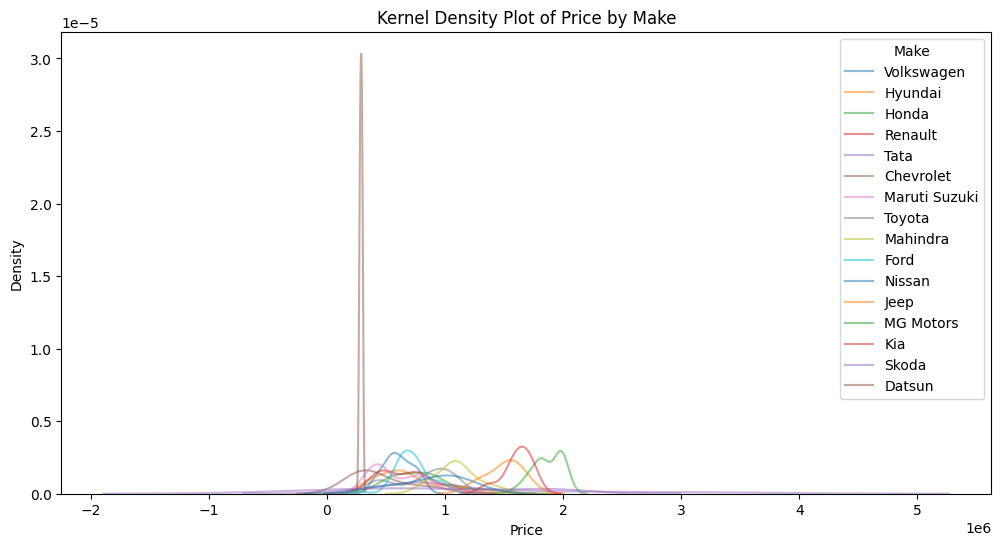

In [58]:
#summarize make variable
price_summary_by_make = cars0.groupby('Make')['Price'].describe()
print(price_summary_by_make)

#create grouped kernel density plot of make
plt.figure(figsize=(12, 6))
for make in cars0['Make'].unique():
    sns.kdeplot(cars0[cars0['Make'] == make]['Price'], label=make, alpha=0.5)
plt.title('Kernel Density Plot of Price by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make')
plt.show()

In [59]:
#identify most expensive
most_expensive_makes = price_summary_by_make.sort_values('mean', ascending=False).head(5)
print("\nMost Expensive Car Brands (based on mean price):")
most_expensive_makes


Most Expensive Car Brands (based on mean price):


,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Skoda,5.0,1.136000e+06,1.070175e+06,436000.0,466000.0,538000.0,1299000.0,2941000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


The car brands that are the most expensive are MG Motors, followed by Kia, Jeep, and Skoda. The prices in general appear to range based on brand. The prices tend to skew right (have a higher density of lower priced cars), as displayed in the first kernel density plot of price.

**3.Split the data into an 80% training set and a 20% testing set.**

In [61]:
from sklearn.model_selection import train_test_split
X = cars.drop('Price', axis=1)
y = cars['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 780
Testing set size: 196


**4.Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?**

In [65]:
#create a model where you regress price on numeric variables alone
numeric_cols = X_train.select_dtypes(include=np.number).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)

y_pred_train_numeric = model_numeric.predict(X_train_numeric)
y_pred_test_numeric = model_numeric.predict(X_test_numeric)

r2_train_numeric = r2_score(y_train, y_pred_train_numeric)
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_pred_train_numeric))
r2_test_numeric = r2_score(y_test, y_pred_test_numeric)
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_pred_test_numeric))

print("Model 1:")
print(f"Training R-squared: {r2_train_numeric:.4f}")
print(f"Training RMSE: {rmse_train_numeric:.4f}")
print(f"Testing R-squared: {r2_test_numeric:.4f}")
print(f"Testing RMSE: {rmse_test_numeric:.4f}")

Model 1:
Training R-squared: 0.9461
Training RMSE: 75737.2290
Testing R-squared: 0.9421
Testing RMSE: 72623.1905


In [71]:
#create a model for the categorical variables
categorical_cols = X_train.select_dtypes(exclude=np.number).columns
X_train_categorical = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_categorical = pd.get_dummies(X_test[categorical_cols], drop_first=True)
X_train_categorical, X_test_categorical = X_train_categorical.align(X_test_categorical, join='left', axis=1, fill_value=0)

model_categorical = LinearRegression()
model_categorical.fit(X_train_categorical, y_train)

y_pred_test_categorical = model_categorical.predict(X_test_categorical)

r2_test_categorical = r2_score(y_test, y_pred_test_categorical)
rmse_test_categorical = np.sqrt(mean_squared_error(y_test, y_pred_test_categorical))

print("Model 2:")
print(f"Training R-squared: {r2_train_categorical:.4f}")
print(f"Training RMSE: {rmse_train_categorical:.4f}")
print(f"Testing R-squared: {r2_test_categorical:.4f}")
print(f"Testing RMSE: {rmse_test_categorical:.4f}")

Model 2:
Training R-squared: 0.7567
Training RMSE: 160904.4291
Testing R-squared: 0.6914
Testing RMSE: 167624.6231


The R squared and RMSE values for the test set and training set are displayted. Model 1 performs better on the test set. We can see this from the much higher model one r-squared value of 0.94, compared to an r swared of 0.69 in model 2.

In [74]:
#create a combined model
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

y_pred_train_combined = model_combined.predict(X_train_combined) # Predict on training data
y_pred_test_combined = model_combined.predict(X_test_combined)

r2_train_combined = r2_score(y_train, y_pred_train_combined) # Calculate R^2 for training set
rmse_train_combined = np.sqrt(mean_squared_error(y_train, y_pred_train_combined))  # Calculate RMSE for training set
r2_test_combined = r2_score(y_test, y_pred_test_combined)
rmse_test_combined = np.sqrt(mean_squared_error(y_test, y_pred_test_combined))

print("Model 3:")
print(f"Training R-squared: {r2_train_combined:.4f}")
print(f"Training RMSE: {rmse_train_combined:.4f}")
print(f"Testing R-squared: {r2_test_combined:.4f}")
print(f"Testing RMSE: {rmse_test_combined:.4f}")

Model 3:
Training R-squared: 0.9794
Training RMSE: 46792.9613
Testing R-squared: 0.9692
Testing RMSE: 52982.4559


The joint model performs better. Model 3 has a slightly higher R-squared value of 0.0271 on the training set and 0.2778 on the test set. Model 3 also has a much lower RMSE value, meaning that there may be more accurate predictions.

**5.Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?**

In [77]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

numeric_cols = X_train.select_dtypes(include=np.number).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_pred_train_poly = model_poly.predict(X_train_poly)
    y_pred_test_poly = model_poly.predict(X_test_poly)

    r2_train_poly = r2_score(y_train, y_pred_train_poly)
    rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
    r2_test_poly = r2_score(y_test, y_pred_test_poly)
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

    print(f"\nPolynomial Degree: {degree}")
    print(f"Training R-squared: {r2_train_poly:.4f}")
    print(f"Training RMSE: {rmse_train_poly:.4f}")
    print(f"Testing R-squared: {r2_test_poly:.4f}")
    print(f"Testing RMSE: {rmse_test_poly:.4f}")

    if r2_test_poly < 0:
        print("R-squared went negative on the test set at degree", degree)
        break


Polynomial Degree: 1
Training R-squared: 0.9461
Training RMSE: 75737.2290
Testing R-squared: 0.9421
Testing RMSE: 72623.1905

Polynomial Degree: 2
Training R-squared: 0.9991
Training RMSE: 9911.1201
Testing R-squared: 0.9988
Testing RMSE: 10560.3280

Polynomial Degree: 3
Training R-squared: 0.9992
Training RMSE: 8972.0907
Testing R-squared: 0.9989
Testing RMSE: 10001.4389

Polynomial Degree: 4
Training R-squared: 0.9952
Training RMSE: 22563.7900
Testing R-squared: 0.9926
Testing RMSE: 25993.8337

Polynomial Degree: 5
Training R-squared: 0.9669
Training RMSE: 59329.6531
Testing R-squared: 0.9541
Testing RMSE: 64631.5559


As you increase the degree of the expansion, the R squared increases, suggesting improved fit to the training data, then decreases with degree 4 and 5. This shows that there may be overfitting. The RMSE decreases as the degree of the expansion increases, but increases with degree 4 and 5.

In [81]:
#find where r-squared goes negative on test set
for degree in range(1, 30):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_pred_test_poly = model_poly.predict(X_test_poly)
    r2_test_poly = r2_score(y_test, y_pred_test_poly)

    if r2_test_poly < 0:
        print(f"R-squared goes negative on the test set at degree {degree}")
        break
    print(f"\nPolynomial Degree: {degree}")
    print(f"Testing R-squared: {r2_test_poly:.4f}")


#find the best model
best_r2_test = -float('inf')
best_rmse_test = float('inf')
best_degree = 0
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    y_pred_test_poly = model_poly.predict(X_test_poly)
    r2_test_poly = r2_score(y_test, y_pred_test_poly)
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

    if r2_test_poly > best_r2_test and rmse_test_poly < best_rmse_test:
        best_r2_test = r2_test_poly
        best_rmse_test = rmse_test_poly
        best_degree = degree

print(f"\nBest model with expanded features (degree {best_degree}):")
print(f"R-squared on test set: {best_r2_test:.4f}")
print(f"RMSE on test set: {best_rmse_test:.4f}")



Polynomial Degree: 1
Testing R-squared: 0.9421

Polynomial Degree: 2
Testing R-squared: 0.9988

Polynomial Degree: 3
Testing R-squared: 0.9989

Polynomial Degree: 4
Testing R-squared: 0.9926

Polynomial Degree: 5
Testing R-squared: 0.9541

Polynomial Degree: 6
Testing R-squared: 0.8448

Polynomial Degree: 7
Testing R-squared: 0.7199

Polynomial Degree: 8
Testing R-squared: 0.2354

Polynomial Degree: 9
Testing R-squared: 0.1144
R-squared goes negative on the test set at degree 10

Best model with expanded features (degree 3):
R-squared on test set: 0.9989
RMSE on test set: 10001.4389


The r squared value goes negative on the test set at polynomial degree 10. For my best model, the r squared is 0.9989, and the RMSE is 10001.44. This model is better then my best model from part four (model 3), as it has a slightly higher R squared value and lower RMSE value.

**6.For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.**

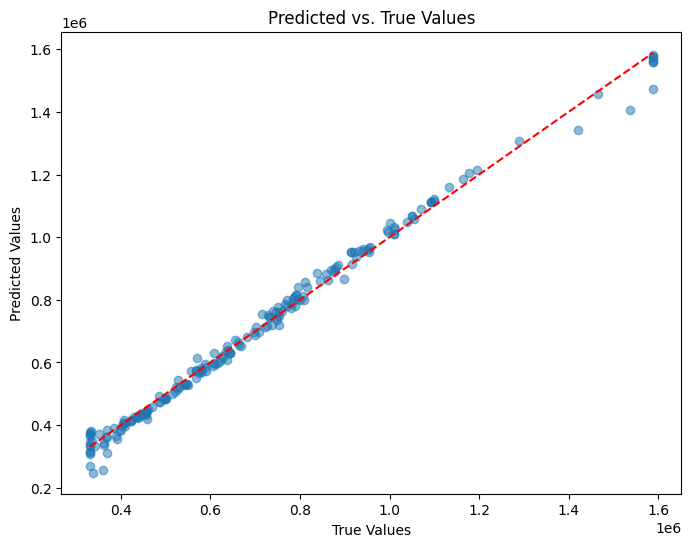

In [84]:
import matplotlib.pyplot as plt

#my best model is the "best model with expanded features" from above
y_pred_best = model_poly.predict(X_test_poly)

#create a scatterplot to see if the predicted and true values line up along diagonal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

The predicted values do line up with the true values, as displayed in the plot above.

<ipython-input-85-f998d9ddeade>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


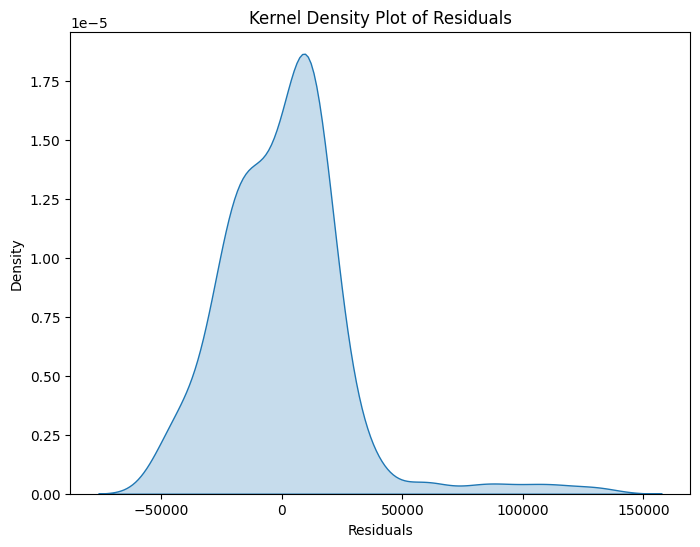

In [85]:
#compute the residuals
residuals = y_test - y_pred_best

#create a kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, shade=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()

The residuals do look roughly bell shaped around 0, as displayed in the plot above. The strengths include that the model has a high R-squared and low RMSE, showing a good fit. Additionally, the predicted and true values align on the scatterplot, and the residuals are close to being bell-shaped around 0. However, there may be overfitting with the polynomial features, especially around degree 4 and 5.